First let's see, what our images look like..

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import numpy as np
import cv2

In [7]:
data_dir = r'C:\Users\Rohit\Desktop\train_DETg9GD'
train = pd.read_csv(os.path.join(data_dir,'train.csv'))

Age :  YOUNG


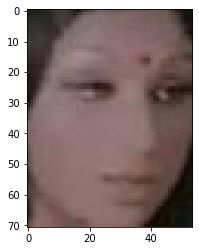

In [8]:
i = random.choice(train.index) #Randomly choosing an image.
img_name = train.ID[i] 
img = cv2.imread(os.path.join(data_dir,'Train',img_name))
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #Color channels in opencv are BGR rather than 
print('Age : ',train.Class[i])
plt.imshow(img)

Age :  MIDDLE


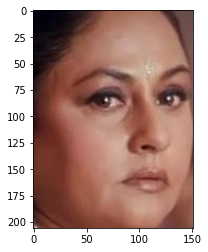

In [9]:
#Let's see another image
i = random.choice(train.index) #Randomly choosing an image.
img_name = train.ID[i] 
img = cv2.imread(os.path.join(data_dir,'Train',img_name))
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #Color channels in opencv are BGR rather than 
print('Age : ',train.Class[i])
plt.imshow(img)

As we can see images are of different sizes, we should resize them to a single size.

In [10]:
#Number of images we have
print(len(train))

19906


In [11]:
#let's first divide the dataset in validation and training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train['ID'],train['Class'], test_size=0.15, random_state=42)    

In [12]:
temp=[]
for image in x_train:
    img_path = os.path.join(data_dir,'Train',image)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(64,64))
    img = img.astype('float')
    temp.append(img)

train_img = np.stack(temp)

In [13]:
temp=[]
for image in x_test:
    img_path = os.path.join(data_dir,'Train',image)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img = cv2.resize(img,(64,64))
    img = img.astype('float')
    temp.append(img)

test_img = np.stack(temp)

So now we have our training images (train_img) and our validation images (test_img).

In [14]:
#let's normalize these images by dividing them 255.0
train_img = train_img/255.0
test_img = test_img/255.0

This marks the end of our preprocessing.
We have now our training images => train_img, 
Training labels => y_train, 
Test images => test_img and  
Test labels => y_test

In [15]:
#Now we will encode our labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_test = le.transform(y_test)
y_train = le.transform(y_train)

In [16]:
import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Using TensorFlow backend.


Now we will start with the model.
I'll be using a Convolutional Neural Network.

In [17]:
from keras.models import Sequential 
from keras.layers import Activation, Dense, Conv2D, Flatten, MaxPooling2D 
from keras import initializers 
from keras import regularizers 
from keras import constraints
from keras import losses 
from keras import optimizers 
from keras import metrics

In [18]:
input_shape = (64,64,3)
model = Sequential()
model.add(Conv2D(32,3,activation='relu',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(712,activation='relu',kernel_initializer = 'he_uniform',kernel_regularizer = 'l2'))
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform',kernel_regularizer = 'l2'))
model.add(Dense(3,activation='softmax',kernel_initializer = 'he_uniform',kernel_regularizer = 'l2'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = [metrics.categorical_accuracy])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 712)               11666120  
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [19]:
model.fit(train_img,y_train,epochs=10,batch_size=64)

Epoch 1/10
16920/16920 [==============================] - 348s 21ms/step - loss: 2.1988 - categorical_accuracy: 0.5872
Epoch 2/10
16920/16920 [==============================] - 260s 15ms/step - loss: 0.8995 - categorical_accuracy: 0.6450
Epoch 3/10
16920/16920 [==============================] - 190s 11ms/step - loss: 0.8438 - categorical_accuracy: 0.6615
Epoch 4/10
16920/16920 [==============================] - 190s 11ms/step - loss: 0.8203 - categorical_accuracy: 0.6756
Epoch 5/10
16920/16920 [==============================] - 189s 11ms/step - loss: 0.8019 - categorical_accuracy: 0.6834
Epoch 6/10
16920/16920 [==============================] - 190s 11ms/step - loss: 0.7856 - categorical_accuracy: 0.6920
Epoch 7/10
16920/16920 [==============================] - 189s 11ms/step - loss: 0.7801 - categorical_accuracy: 0.6985
Epoch 8/10
16920/16920 [==============================] - 189s 11ms/step - loss: 0.7586 - categorical_accuracy: 0.7073
Epoch 9/10
16920/16920 [========================

71.26 % is really good score, considering most images in the dataset are blurry and of different angles.
Now let's see how does it perform on unseen data.

In [23]:
loss , accuracy = model.evaluate(test_img,y_test)
print('Loss : ',loss,'\nAccuracy : ',accuracy)

2986/2986 [==============================] - 9s 3ms/step
Loss :  0.7750480747510344 
Accuracy :  0.7163429260253906


71.63 % accuracy on validation set (previously unseen by the model) is a really good score, and it seems our model is working well and is not overfitting the training set.